In [156]:
from nt_toolbox.general import *
from nt_toolbox.signal import *
from nt_toolbox.compute_wavelet_filter import *
import cv2

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/Users/salmakertit/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [157]:
name = 'barbara.jpg'
n = 512
M = load_image(name, n)

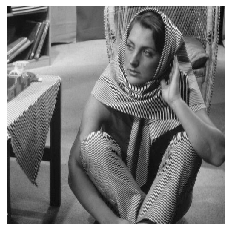

In [158]:
imageplot(M)

In [159]:
sigma = .08

In [160]:
y = M + sigma*random.standard_normal(M.shape)

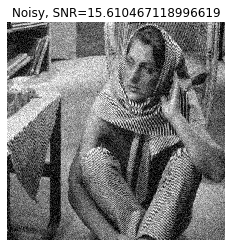

In [161]:
#noisy image
imageplot(clamp(y), 'Noisy, SNR=' + str(snr(M,y)))

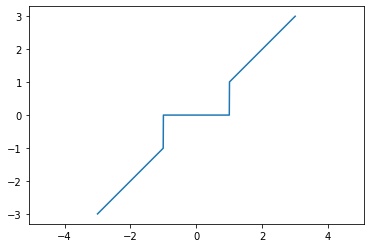

In [162]:
def thresh_hard(u,t):return u*(abs(u)>t)
alpha = linspace(-3,3,1000)
plot(alpha, thresh_hard(alpha,1))
axis('equal');

In [194]:
#Parameters for the orthogonal wavelet transformv
# for wavelet family Daubechies, we replace h by  h = compute_wavelet_filter("Daubechies", 1)
h = [0, .482962913145, .836516303738, .224143868042, -.129409522551]
h = h/norm(h)

Jmin = 2

In [190]:
#we compute the wavelet coefficients a of the noisy image f

a = perform_wavortho_transf(y,Jmin,+1,h)


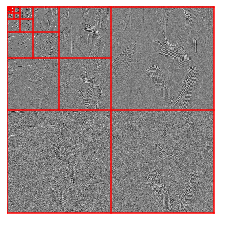

In [183]:
ah=plot_wavelet(a,Jmin);


In [184]:
#Select the threshold value, that should be proportional to the noise level  
T = 3*sigma


In [185]:
aT = thresh_hard(a,T)


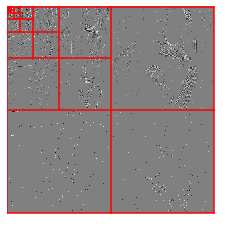

In [186]:
plot_wavelet(aT,Jmin);


In [187]:
#Reconstruct the image f̃ from these noisy coefficients.
fHard = perform_wavortho_transf(aT,Jmin,-1,h)


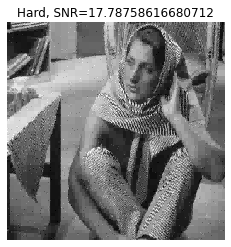

In [188]:
imageplot(clamp(fHard), 'Hard, SNR=' + str(snr(M,fHard)) )


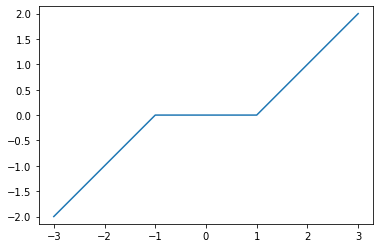

In [111]:
def thresh_soft(u,t):return maximum(1-t/abs(u), 0)*u
alpha = linspace(-3,3,1000)
plot(alpha, thresh_soft(alpha,1))
axis('equal');

In [112]:
T = 3/2*sigma


In [113]:
aT = thresh_soft(a,T)


In [114]:
aT[:2^Jmin:,:2^Jmin:] = a[:2^Jmin:,:2^Jmin:]


In [115]:
fSoft = perform_wavortho_transf(aT,Jmin,-1,h)


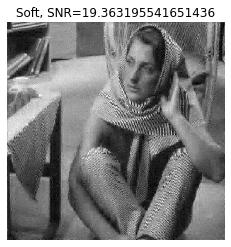

In [116]:
imageplot(clamp(fSoft), 'Soft, SNR=' + str(snr(M,fSoft)) )
